# Data Set Problems


#### The Aim of this project is to automate the real-time loan qualification process using customer-provided information from online application forms. The objective is to develop machine learning models that can predict loan approval, streamlining the decision-making process and quickly determining an applicant's eligibility for a loan


## The machine learning models used in this project are:
* Logistic Regression
* K-Nearest Neighbour (KNN)
* Support Vector Machine (SVM)
* Decision Tree
* Random Forest
* Gradient Boost

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings 
import os
import scipy
import imblearn
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# 3.Reading Data Set
* Importing Data Set

In [4]:
df = pd.read_csv(r"C:\Users\kvpaw\Downloads\data science by excelr\Projects\loan_data_set.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(df.shape)

(614, 13)


In [7]:
# There are 13 columns which are readable. It also can be seen that there are 614 observations in the data set

# 4. Data Exploration
This section will perform data exploration of "raw" data set that has been imported.

## 4.1 Categorical Variables
* We will now explore categorical variables *
### 4.1.1 Loan ID

In [8]:
df.Loan_ID.value_counts(dropna = False)

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64

* It can be seen that there are 614 unique ID in the dataset. *

### 4.1.2 Gender

In [9]:
df.Gender.value_counts(dropna = False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

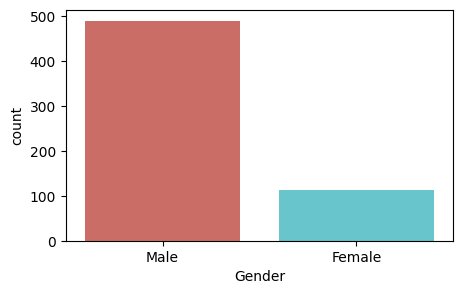

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "Gender",palette = "hls")
plt.show()

In [11]:
countMale = len(df[df['Gender'] == "Male"])
countFemale = len(df[df['Gender'] == "Female"])
countNull = len(df[df.Gender.isnull()])

print('Percentage of Male application',((countMale/len(df.Gender))*100))
print('Percentage of Female application',((countFemale/len(df.Gender))*100))
print('Missing Values',((countNull/len(df.Gender))*100))



Percentage of Male application 79.64169381107492
Percentage of Female application 18.241042345276874
Missing Values 2.1172638436482085


### 4.1.3 Married

In [12]:
df.Married.value_counts(dropna = False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

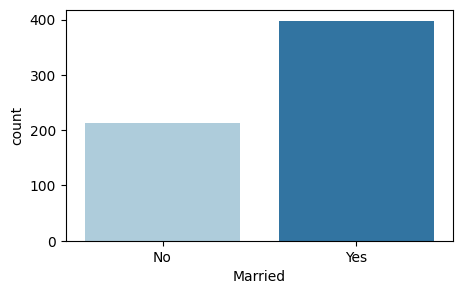

In [13]:
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "Married",palette = "Paired")
plt.show()

 The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column. 

In [14]:
countMarried = len(df[df["Married"] == "Yes"])
countNotMarried = len(df[df["Married"] == "No"])
countNull = len(df[df["Married"].isnull()])

print("Percentage of Married :",(countMarried/len(df["Married"])*100))
print("Percentage of UnMarried :",(countNotMarried/len(df["Married"])*100))
print("Missing Value Percentage :",(countNull/len(df["Married"])*100))

Percentage of Married : 64.82084690553745
Percentage of UnMarried : 34.69055374592834
Missing Value Percentage : 0.4885993485342019


### 4.1.4 Education

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df["Education"].value_counts(dropna = False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

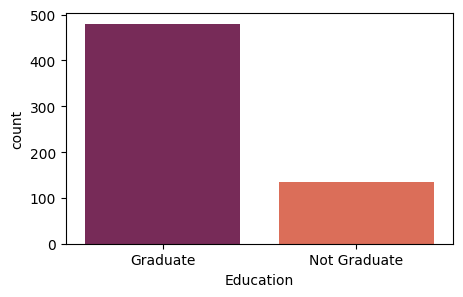

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "Education",palette = "rocket")
plt.show()

In [18]:
countGraduate = len(df[df["Education"] == "Graduate"])
countNotGraduate = len(df[df["Education"] == "Not Graduate"])
countNull = len(df[df["Education"].isnull()])

print("Percentage of graduate applicant :",(countGraduate/len(df["Education"]))*100)
print("Percentage of Non graduate applicant :",(countNotGraduate/len(df["Education"]))*100)
print("Missing Value Percentage :",(countNull/len(df["Education"]))*100)

Percentage of graduate applicant : 78.17589576547232
Percentage of Non graduate applicant : 21.824104234527688
Missing Value Percentage : 0.0


 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### 4.1.5 Self Employed

In [19]:
df.Self_Employed.value_counts(dropna = False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

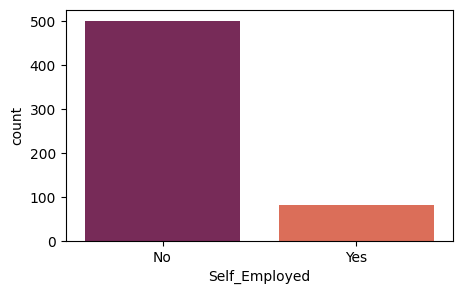

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = "Self_Employed",palette = "rocket")
plt.show()

In [21]:
countNo = len(df[df["Self_Employed"] == "No"])
countYes = len(df[df["Self_Employed"] == "Yes"])
countNull = len(df[df["Self_Employed"].isnull()])

print("Percentage of No Self emplyed applicant :",(countNo/len(df["Self_Employed"]))*100)
print("Percentage of Self Employed applicant :",(countYes/len(df["Self_Employed"]))*100)
print("Missing Value Percentage :",(countNull/len(df["Self_Employed"]))*100)

Percentage of No Self emplyed applicant : 81.43322475570032
Percentage of Self Employed applicant : 13.355048859934854
Missing Value Percentage : 5.211726384364821


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### 4.1.6 Credit History

In [22]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [23]:
df.Credit_History.value_counts(dropna = False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

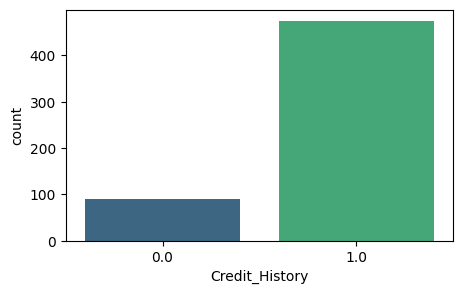

In [24]:
plt.figure(figsize = (5,3))
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [25]:
count1 = len(df[df["Credit_History"] == 1])
count0 = len(df[df["Credit_History"] == 0])
countNull = len(df[df["Credit_History"].isnull()])

print("Percentage of Good Credit History :",(count1/len(df["Credit_History"]))*100)
print("Percentage of Bad Credit HIstory :",(count0/len(df["Credit_History"]))*100)
print("Missing Value Percentage :",(countNull/len(df["Credit_History"]))*100)

Percentage of Good Credit History : 77.36156351791531
Percentage of Bad Credit HIstory : 14.495114006514658
Missing Value Percentage : 8.143322475570033


The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### 4.1.7 Property Area

In [26]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [27]:
df.Property_Area.value_counts(dropna = False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

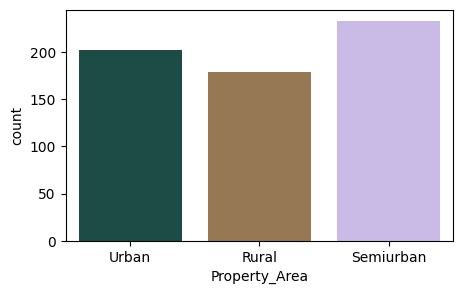

In [28]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Property_Area",data = df, palette = "cubehelix")
plt.show()

In [29]:
countUrban = len(df[df["Property_Area"] == "Urban"])
countRural = len(df[df["Property_Area"] == "Rural"])
countSemiurban = len(df[df["Property_Area"] == "Semiurban"])

print("Percentage of Urban :",(countUrban/len(df["Credit_History"]))*100)
print("Percentage of Rural :",(countRural/len(df["Credit_History"]))*100)
print("Percentage of Semiurban :",(countSemiurban/len(df["Credit_History"]))*100)

Percentage of Urban : 32.89902280130293
Percentage of Rural : 29.153094462540718
Percentage of Semiurban : 37.94788273615635


### 4.1.8 Loan Status

In [30]:
df.Loan_Status.value_counts(dropna = False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

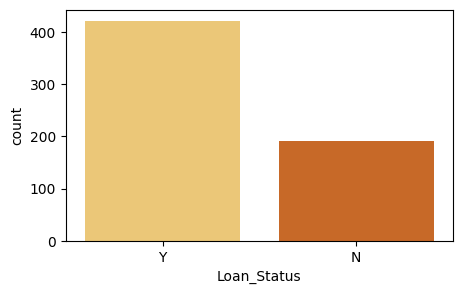

In [31]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Loan_Status",data = df, palette = "YlOrBr")
plt.show()

In [32]:
countY = len(df[df["Loan_Status"] == "Y"])
countN = len(df[df["Loan_Status"] == "N"])
countNull = len(df[df["Loan_Status"].isnull()])

print("Percentage of Approved :",(countY/len(df["Loan_Status"]))*100)
print("Percentage of Rejected :",(countN/len(df["Loan_Status"]))*100)
print("Percentage of Missing Values :",(countNull/len(df["Loan_Status"]))*100)

Percentage of Approved : 68.72964169381108
Percentage of Rejected : 31.27035830618892
Percentage of Missing Values : 0.0


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### 4.1.8 Loan Amount Term

In [33]:
df.Loan_Amount_Term.value_counts(dropna = False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

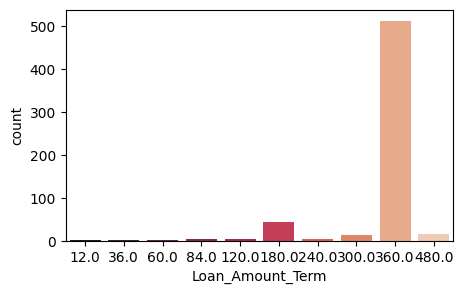

In [34]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Loan_Amount_Term",data = df, palette = "rocket")
plt.show()

In [35]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [36]:
count12 = len(df[df["Loan_Amount_Term"] == 12])
count36 = len(df[df["Loan_Amount_Term"] == 36])
count60 = len(df[df["Loan_Amount_Term"] == 60])
count84 = len(df[df["Loan_Amount_Term"] == 84])
count120 = len(df[df["Loan_Amount_Term"] == 120])
count180 = len(df[df["Loan_Amount_Term"] == 180])
count240 = len(df[df["Loan_Amount_Term"] == 240])
count300 = len(df[df["Loan_Amount_Term"] == 300])
count360 = len(df[df["Loan_Amount_Term"] == 360])
count480 = len(df[df["Loan_Amount_Term"] == 480])

print("Percentage of 12 :",(count12/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 36 :",(count36/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 60 :",(count60/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 84 :",(count84/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 120 :",(count120/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 180 :",(count180/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 240 :",(count240/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 300 :",(count300/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 360 :",(count360/len(df["Loan_Amount_Term"]))*100)
print("Percentage of 480 :",(count480/len(df["Loan_Amount_Term"]))*100)


Percentage of 12 : 0.16286644951140067
Percentage of 36 : 0.32573289902280134
Percentage of 60 : 0.32573289902280134
Percentage of 84 : 0.6514657980456027
Percentage of 120 : 0.4885993485342019
Percentage of 180 : 7.166123778501629
Percentage of 240 : 0.6514657980456027
Percentage of 300 : 2.1172638436482085
Percentage of 360 : 83.38762214983714
Percentage of 480 : 2.44299674267101


As can be seen from the results, the 360 days loan duration is the most popular compared to others.

### 4.2 Numerical Variables
The second Variable that I will explore is Numerical Variable

### 4.2.1 Descirbe Numerical Variable
 This section will show mean, count, std, min, max and others using describe function.

In [37]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [38]:
df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### 4.2.2 Distribution of Numerical Variable
In this section, I will show the distribution of numerical variable using histogram.

#### 4.2.2.1 Histogram Distribution

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

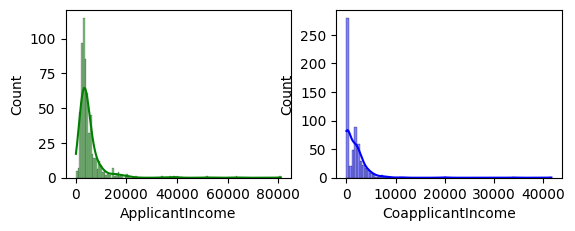

In [39]:
plt.subplot(2,2,1)
sns.histplot(data = df, x ="ApplicantIncome", kde = True,color = "Green")
plt.subplot(2,2,2)
sns.histplot(data = df, x ="CoapplicantIncome",kde = True, color = "Blue")

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

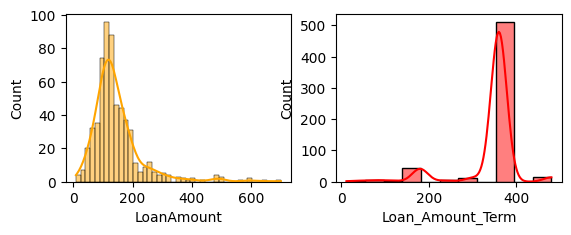

In [40]:
plt.subplot(2,2,1)
sns.histplot(data = df, x = "LoanAmount", kde = True, color = "Orange")
plt.subplot(2,2,2)
sns.histplot(data = df, x = "Loan_Amount_Term", kde = True, color = "Red")

#### 4.2.2.2 Boxplot

<Axes: xlabel='CoapplicantIncome'>

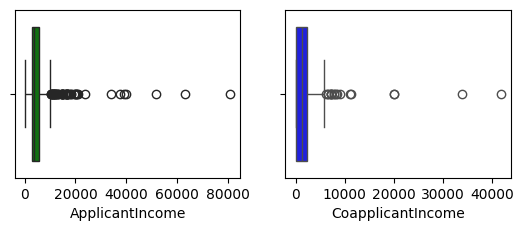

In [41]:
plt.subplot(2,2,1)
sns.boxplot(data = df, x ="ApplicantIncome", color = "Green")
plt.subplot(2,2,2)
sns.boxplot(data = df, x ="CoapplicantIncome", color = "Blue")

<Axes: xlabel='Loan_Amount_Term'>

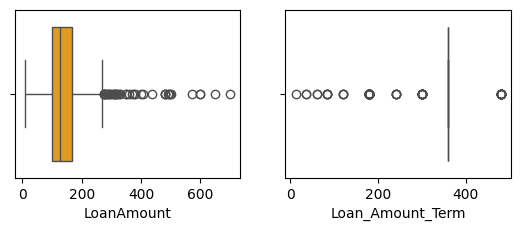

In [42]:
plt.subplot(2,2,3)
sns.boxplot(data = df, x = "LoanAmount", color = "Orange")
plt.subplot(2,2,4)
sns.boxplot(data = df, x = "Loan_Amount_Term", color = "Red")

* The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and boxplot).
* The distribution of Loan Amount Term is negativly skewed and it has outliers.

## 4.3 Other Exploration
This section will show additional exploration from each variables. The additional exploration are:
* Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
* Heatmap

In [43]:
df2 = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

### 4.3.1 Heatmap

<Axes: >

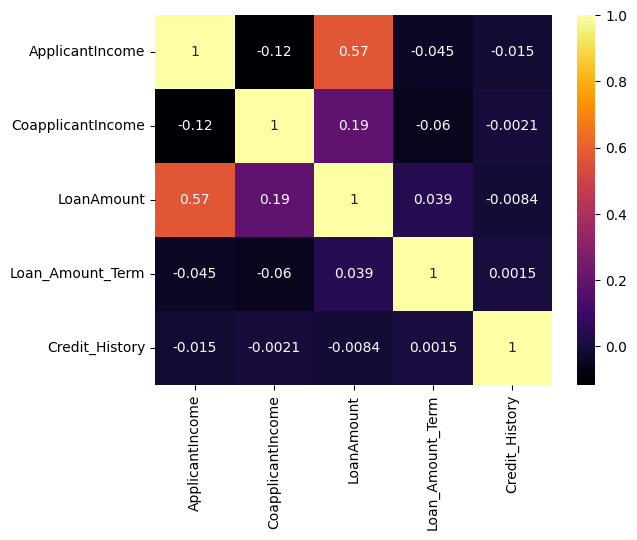

In [44]:
sns.heatmap(df2.corr(),annot=True, cmap = "inferno")

There is positive correlation between Loan Amount and Applicant Income

### 4.3.2 Categorical VS Categorical

In [45]:
import pandas as pd

<Figure size 300x300 with 0 Axes>

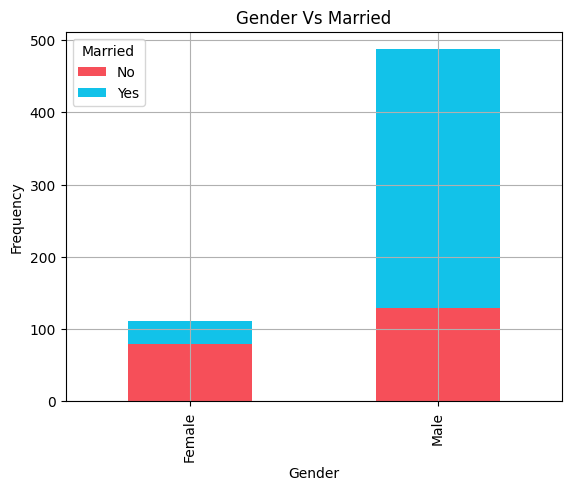

In [46]:
plt.figure(figsize = (3,3))
pd.crosstab(df.Gender,df.Married).plot(kind = "bar",stacked = True,color=['#f64f59','#12c2e9'],grid = True)
plt.title("Gender Vs Married")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

<Figure size 300x300 with 0 Axes>

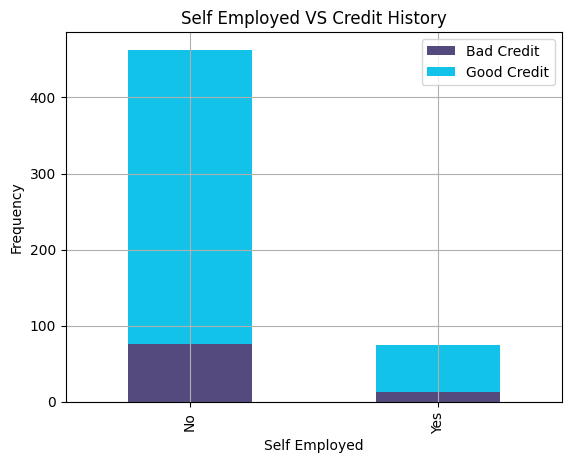

In [47]:
plt.figure(figsize = (3,3))
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind = "bar",stacked = True,color=['#544a7d','#12c2e9'],grid = True)
plt.title("Self Employed VS Credit History")
plt.xlabel("Self Employed")
plt.ylabel("Frequency")
plt.legend(["Bad Credit","Good Credit"])
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

In [48]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


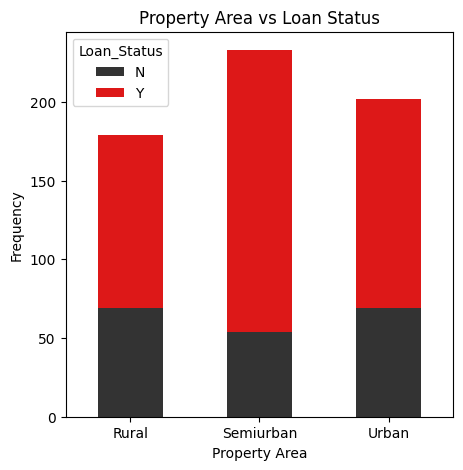

In [49]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

### 4.3.3 Numerical - Numerical

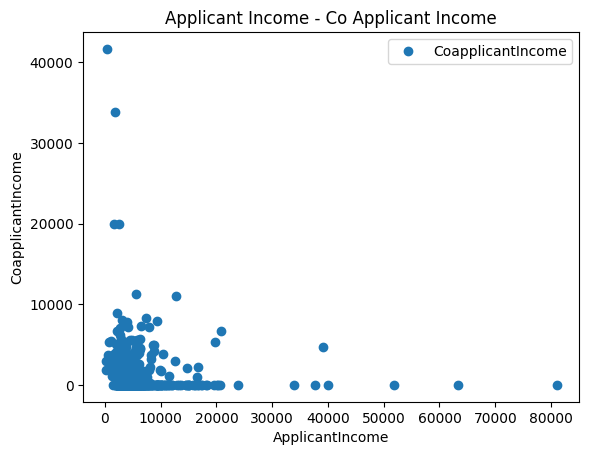

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=np.float64(13.835753259915665), pvalue=np.float64(1.460983948423972e-40), df=np.float64(1226.0))


In [50]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

* There is negative correlation between Applicant income and Co Applicant Income.
* The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

## 4.4 Null Values

In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

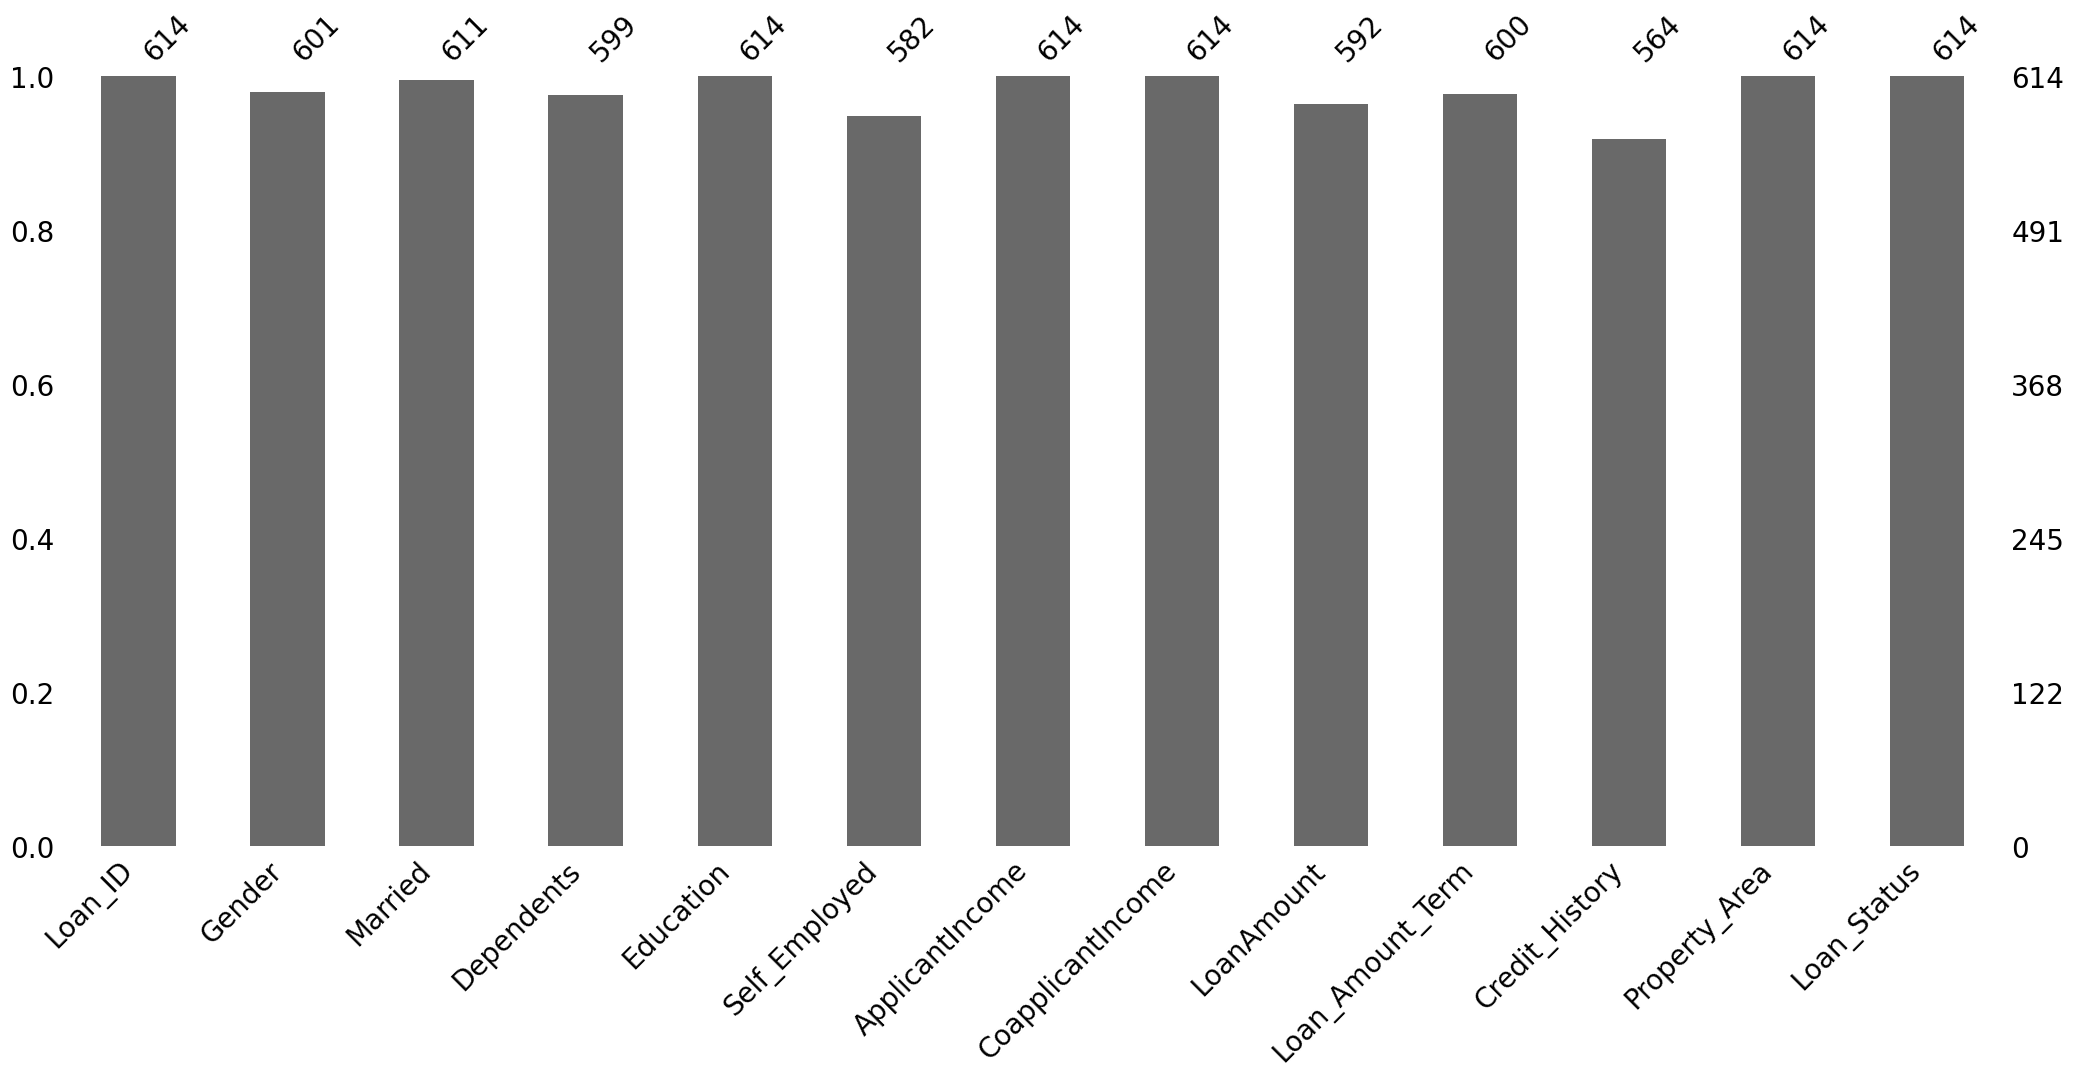

In [52]:
plt.figure(figsize = (5,3))
mso.bar(df, fontsize = 20)

Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored for all variables in the dataset.

# 5. Data Preprocessing

## 5.1 Drop Unecessary Variables 
Unecessary variables will be dropped in this section

In [53]:
df = df.drop(labels = "Loan_ID", axis = 1)

## 5.2 Data Imputation
 Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

In [54]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


### 5.2.1 Categorical Variables
 In this section, the imputation for categorical variables will be performed using mode.

In [55]:
df["Gender"].mode()[0]

'Male'

In [56]:
df.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [57]:
df['Gender'].fillna(df["Gender"].mode()[0],inplace = True)
df['Married'].fillna(df["Married"].mode()[0],inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace = True)

In [58]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### 5.2.2 Numerical Variables
The next section is imputation for numerical variables using mean.

In [59]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace = True)

## 5.3 One-hot Encoding 
In this section, I will transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [60]:
df = pd.get_dummies(df)

In [61]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,True,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
610,4106,0.0,40.000000,180.0,1.0,False,True,False,True,False,...,True,True,False,True,False,True,False,False,False,True
611,8072,240.0,253.000000,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True
612,7583,0.0,187.000000,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True


In [62]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [63]:
# Drop Columns
df = df.drop(labels = ['Gender_Female', 'Married_No','Education_Not Graduate', 'Self_Employed_No','Loan_Status_N'],axis = 1)
# Rename Column Names
new = {'Gender_Male':"Gender","Married_Yes":"Married",'Education_Graduate':"Education",'Self_Employed_Yes':'Self_Employed','Loan_Status_Y':'Loan_Status'}
df.rename(columns = new,inplace = True)

## 5.3 Remove Outliers & Infinite values
Since there are outliers, the outliers will be removed.

In [64]:
def remove_outliers(df):
    #columns: List of numerical columns to check for outliers. 
    columns = df.select_dtypes(include = np.number).columns
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [65]:
df = remove_outliers(df)

## 5.4 Skewed Distribution Treatment 
* In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
*  I will use square root transformation to normalized the distribution.

In [66]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

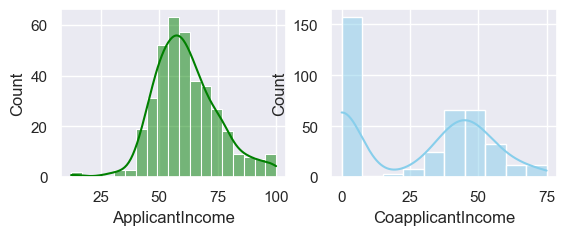

In [67]:
sns.set(style = "darkgrid")
plt.subplot(2,2,1)
sns.histplot(data = df, x = "ApplicantIncome", kde = True, color = 'green')
plt.subplot(2,2,2)
sns.histplot(data = df, x = "CoapplicantIncome", kde = True, color = "skyblue")

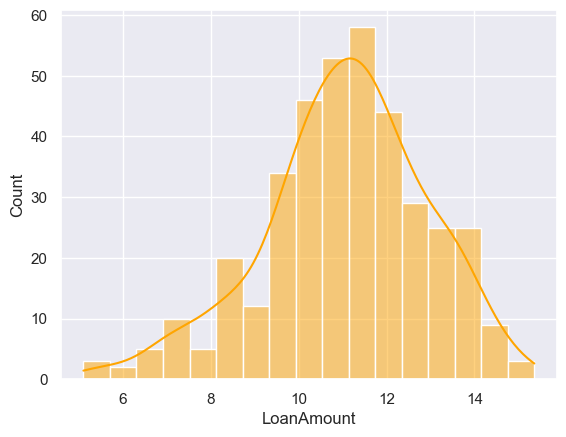

In [68]:
sns.set(style = "darkgrid")
plt.subplot(1,1,1)
sns.histplot(data=df, x="LoanAmount", kde=True, color='orange');

## 5.5 Features Separating 
Dependent features (Loan_Status) will be seperated from independent features.

In [69]:
X = df.drop(['Loan_Status'],axis = 1)
Y = df['Loan_Status']

## 5.6 SMOTE Technique 
In this section, oversampling technique will be used to avoid overfitting,

In [70]:
X, Y = SMOTE().fit_resample(X, Y)

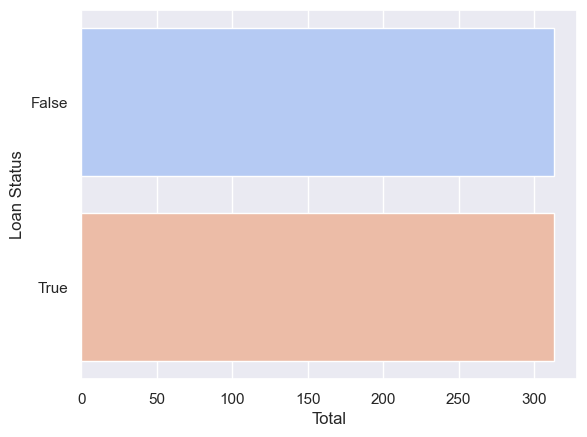

In [71]:
sns.set_theme(style="darkgrid")
sns.countplot(y=Y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

As can be seen, the distrubtion of Loan status are now balanced.

## 5.7 Data Normalization 
In this section, data normalization will be performed to normalize the range of independent variables or features of data.

In [72]:
X = MinMaxScaler().fit_transform(X)

## 5.8 Splitting Data Set
The data set will be split into 80% train and 20% test.

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

# 6. Models 

## 6.1 Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
LRclassifier = LogisticRegression(max_iter = 500, random_state = 1)
LRclassifier.fit(X_train,Y_train)
Y_pred = LRclassifier.predict(X_test)
LRAcc = accuracy_score(Y_test,Y_pred)

In [76]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
print('Accuracy Score : ',accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

       False       0.92      0.77      0.84        57
        True       0.83      0.94      0.88        69

    accuracy                           0.87       126
   macro avg       0.88      0.86      0.86       126
weighted avg       0.87      0.87      0.86       126

[[44 13]
 [ 4 65]]
Accuracy Score :  86.5079365079365


## 6.2 K-Nearest Neighbour (KNN)

In [77]:
scorelistknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train,Y_train)
    scorelistknn.append(KNclassifier.score(X_test,Y_test))

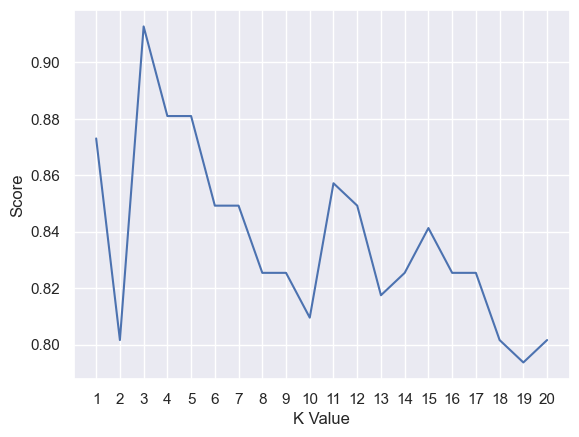

KNN best score is : 91.26984126984127


In [78]:
plt.plot(range(1,21),scorelistknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K Value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scorelistknn)
print("KNN best score is :", KNAcc*100)

## 6.3 Decision Tree

In [79]:
scorelistDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes = i)
    DTclassifier.fit(X_train,Y_train)
    scorelistDT.append(DTclassifier.score(X_test,Y_test))
print(scorelistDT)

[0.7619047619047619, 0.7380952380952381, 0.8095238095238095, 0.8095238095238095, 0.8253968253968254, 0.8015873015873016, 0.8412698412698413, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.873015873015873, 0.8809523809523809, 0.8809523809523809, 0.873015873015873, 0.8809523809523809, 0.8809523809523809, 0.873015873015873, 0.8809523809523809, 0.8809523809523809]


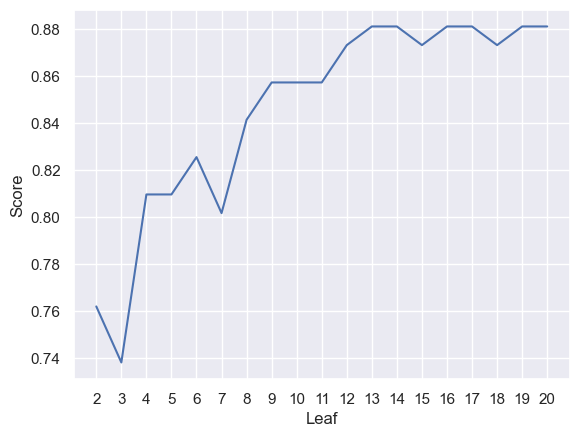

Decision Tree Accuracy : 88.09523809523809


In [80]:
plt.plot(range(2,21),scorelistDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scorelistDT)
print("Decision Tree Accuracy :",DTAcc*100)

## 6.4 Random Forest

In [81]:
%%time
scoreListRF = []
for i in range(2,25):
    RFclassifier= RandomForestClassifier(n_estimators=1000, random_state=1,max_leaf_nodes=i)
    RFclassifier.fit(X_train,Y_train)
    scoreListRF.append(RFclassifier.score(X_test, Y_test))

CPU times: total: 20 s
Wall time: 29.9 s


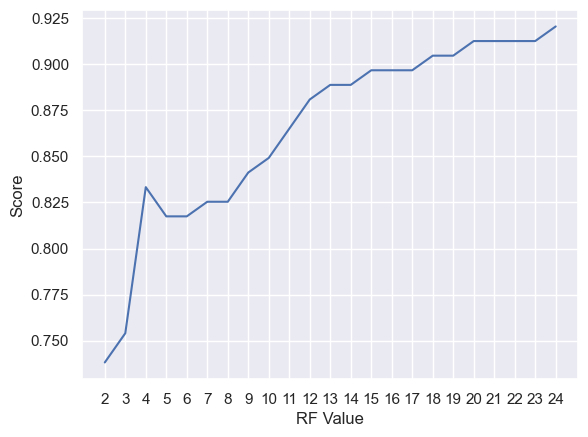

Random Forest Accuracy :  0.9206349206349206


In [82]:
plt.plot(range(2,25),scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy : ",RFAcc)

## 6.5 Gradient Boosting

In [83]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [84]:
%%time
GB = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                  param_distributions = {'n_estimators':[100,200,300,400,500],
                                "max_depth":[1,2,3,4,5],
                                "max_leaf_nodes":[2,5,10,20,30,40,50]},
                  cv = 20)
GB.fit(X_train, Y_train)

CPU times: total: 1min 1s
Wall time: 1min 26s


RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [85]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=30, n_estimators=200)
0.8520000000000001
{'n_estimators': 200, 'max_leaf_nodes': 30, 'max_depth': 5}
1


In [89]:
GBclassifier = GradientBoostingClassifier(n_estimators = 400, max_leaf_nodes = 40, 
                                          max_depth = 5)
GBclassifier.fit(X_train,Y_train)

Y_pred = GBclassifier.predict(X_test)

GBAcc = accuracy_score(Y_test,Y_pred)
print('................................................................')
print('Classification Report \n', classification_report(Y_test,Y_pred))
print('................................................................')
print('Confusion Matrix \n', confusion_matrix(Y_test,Y_pred))
print('................................................................')
print('Gradient Boosting Accuracy Score is : \n', accuracy_score(Y_test,Y_pred))
print('................................................................')

................................................................
Classification Report 
               precision    recall  f1-score   support

       False       0.91      0.91      0.91        57
        True       0.93      0.93      0.93        69

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126

................................................................
Confusion Matrix 
 [[52  5]
 [ 5 64]]
................................................................
Gradient Boosting Accuracy Score is : 
 0.9206349206349206
................................................................


## 6.6 Support Vector Machine (SVM)

In [90]:
SVCclassifier = SVC(kernel='rbf',max_iter = 500)
SVCclassifier.fit(X_train,Y_train)

Y_pred = SVCclassifier.predict(X_test)
SVMAcc = accuracy_score(Y_test,Y_pred)

print('................................................................')
print('Classification Report \n', classification_report(Y_test,Y_pred))
print('................................................................')
print('Confusion Matrix \n', confusion_matrix(Y_test,Y_pred))
print('................................................................')
print('Support Vector Machine Accuracy Score is : \n', accuracy_score(Y_test,Y_pred))
print('................................................................')

................................................................
Classification Report 
               precision    recall  f1-score   support

       False       0.98      0.72      0.83        57
        True       0.81      0.99      0.89        69

    accuracy                           0.87       126
   macro avg       0.89      0.85      0.86       126
weighted avg       0.88      0.87      0.86       126

................................................................
Confusion Matrix 
 [[41 16]
 [ 1 68]]
................................................................
Support Vector Machine Accuracy Score is : 
 0.8650793650793651
................................................................


# 7. Model Comparision

In [91]:
compare = pd.DataFrame({"Model" : ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        "Accuracy" : [LRAcc*100, KNAcc*100, SVMAcc*100, 
                                    DTAcc*100, RFAcc*100, GBAcc*100]})
compare.sort_values(by = "Accuracy",ascending = False)

,Model,Accuracy
4,Random Forest,92.063492
5,Gradient Boost,92.063492
1,K Neighbors,91.269841
3,Decision Tree,88.095238
0,Logistic Regression,86.507937
2,SVM,86.507937


*  In general, it can be seen that all models can achieve up to 80% accuracy.
*  The highest accuracy is 92 %, which is acheived by Random Forest Model.